In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
url = 'https://raw.githubusercontent.com/consta35/thd/master/Intro_to_Python_Sample_Data.csv'
df1 = pd.read_csv(url)

In [0]:
df1.head()

,Hash_Trans_ID,SKU_ID,Transaction_Date_ID,Transaction_Hour_ID,Online_Order_Type,Online_Order_Type_Desc,Transaction_Type,Transaction_Sales_Type,POS_Sales,POS_UnitsSold,Department_ID,Class_ID,SubClass_ID,SubClass_Desc,Product_Weight,Product_Weight_Dimension,Product_Height,Product_Length,Product_Width,Product_Unit_Dimension,Product_Volumn,Product_Volumn_Unit,PRO
0,d3f687e772e36967aec72e249a5a30017f4f433c,170085.4524,20140114,161945,IN-STORE,IN-STORE,Commercial Line Sale,Sales,1194.00,1.0,25,2121,10749,25XX0807 MITER SAWS,38,LB,18,25,20,IN,4,FT3,0
1,aab9ab77c8169454a719414325702fd15ebfeba0,170084.1813,20150423,81833,IN-STORE,IN-STORE,Front line - Sales,Sales,474.96,4.0,23,2057,10350,23XX1105 LAMINATE AC,2,LB,3,3,12,IN,0,FT3,1
2,3230f7850b99cd98b73a319f4cfaf266b98151b0,170091.8901,20150508,93708,IN-STORE,IN-STORE,Pro Desk - Refund,Special Order Sales,1110.96,3.0,23,2050,12677,23XX0412 GRIPSTRIP T,37,LB,14,2,38,IN,0,FT3,1
3,f364a11c471d66534cd04244c827a7f4393f6259,170113.4248,20150511,93132,IN-STORE,IN-STORE,Garden Sales,Sales,59.94,1.0,28,2204,11322,28XX0310 AMENDMENTS/,22,LB,9,12,15,IN,1,FT3,0
4,f364a11c471d66534cd04244c827a7f4393f6259,170028.8084,20150511,93132,IN-STORE,IN-STORE,Garden Sales,Sales,71.94,1.0,28,2204,11322,28XX0310 AMENDMENTS/,0,LB,0,0,0,IN,0,FT3,0


In [0]:
## Average Basket
df1.POS_Sales.mean()

421.5535570469796

In [28]:
df1.columns

Index(['Hash_Trans_ID', 'SKU_ID', 'Transaction_Date_ID', 'Transaction_Hour_ID',
       'Online_Order_Type', 'Online_Order_Type_Desc', 'Transaction_Type',
       'Transaction_Sales_Type', 'POS_Sales', 'POS_UnitsSold', 'Department_ID',
       'Class_ID', 'SubClass_ID', 'SubClass_Desc', 'Product_Weight',
       'Product_Weight_Dimension', 'Product_Height', 'Product_Length',
       'Product_Width', 'Product_Unit_Dimension', 'Product_Volumn',
       'Product_Volumn_Unit', 'PRO'],
      dtype='object')

In [51]:
df1.describe()

,SKU_ID,Transaction_Date_ID,Transaction_Hour_ID,POS_Sales,POS_UnitsSold,Department_ID,Class_ID,SubClass_ID,Product_Weight,Product_Height,Product_Length,Product_Width,Product_Volumn,PRO
count,149.00000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,170087.80276,2.014728e+07,130177.040268,421.553557,4.534899,26.456376,2178.187919,11264.973154,9.181208,14.241611,20.416107,32.751678,0.859060,0.684564
std,44.55978,5.315956e+03,38507.062688,1645.088856,18.989161,8.203891,109.105167,806.930872,23.366369,55.554411,29.779846,161.325418,2.688866,0.466257
min,170017.23120,2.013051e+07,73238.000000,-4194.000000,-90.000000,11.000000,2004.000000,10026.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170031.55860,2.014113e+07,100321.000000,65.940000,1.000000,23.000000,2081.000000,10537.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,170091.86150,2.015041e+07,123047.000000,149.220000,1.000000,27.000000,2173.000000,11175.000000,1.000000,3.000000,7.000000,5.000000,0.000000,1.000000
75%,170125.79470,2.015070e+07,161237.000000,393.960000,3.000000,28.000000,2258.000000,11937.000000,7.000000,9.000000,28.000000,12.000000,0.000000,1.000000
max,170161.50290,2.015111e+07,210714.000000,17280.780000,144.000000,59.000000,2414.000000,12698.000000,210.000000,575.000000,151.000000,1625.000000,19.000000,1.000000


In [0]:
## Average Basket Pros vs Consumers
break_down = df1.groupby(['Department_ID']).agg({'POS_Sales':'mean', 
                          'Hash_Trans_ID' : pd.Series.nunique,
                         'SubClass_Desc' : pd.Series.nunique}).reset_index().sort_values('POS_Sales', ascending = False)

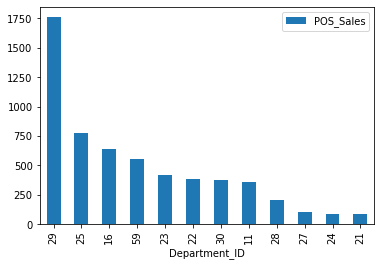

In [56]:
break_down.plot(x = 'Department_ID', y ='POS_Sales', kind = 'bar')

In [0]:
consumers = df1[df1['PRO'] == 0]

In [12]:
consumers['POS_Sales'].describe()

count       47.000000
mean       792.218298
std       2553.547945
min       -479.100000
25%         71.850000
50%        179.880000
75%        548.640000
max      17280.780000
Name: POS_Sales, dtype: float64

(array([42.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ -479.1  ,  1296.888,  3072.876,  4848.864,  6624.852,  8400.84 ,
        10176.828, 11952.816, 13728.804, 15504.792, 17280.78 ]),
 <a list of 10 Patch objects>)

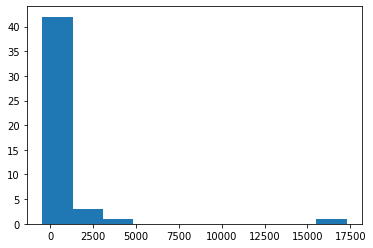

In [19]:
plt.hist(consumers['POS_Sales'])

In [27]:
17280 > (2* 2553.55)

True

In [0]:
pros = df1[df1['PRO'] == 1]

In [24]:
pros['POS_Sales'].describe()

count     102.000000
mean      250.757059
std       950.008401
min     -4194.000000
25%        62.250000
50%       143.940000
75%       360.000000
max      5954.760000
Name: POS_Sales, dtype: float64

(array([ 2.,  0.,  1.,  2., 88.,  6.,  2.,  0.,  0.,  1.]),
 array([-4194.   , -3179.124, -2164.248, -1149.372,  -134.496,   880.38 ,
         1895.256,  2910.132,  3925.008,  4939.884,  5954.76 ]),
 <a list of 10 Patch objects>)

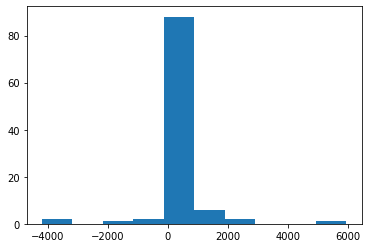

In [29]:
plt.hist(pros['POS_Sales'])

In [30]:
2*950

1900

(array([ 2., 58., 83.,  4.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-4194.   , -2046.522,   100.956,  2248.434,  4395.912,  6543.39 ,
         8690.868, 10838.346, 12985.824, 15133.302, 17280.78 ]),
 <a list of 10 Patch objects>)

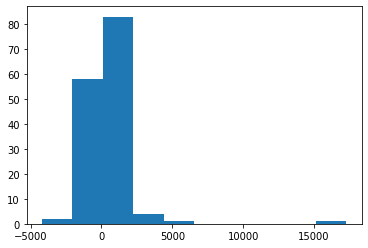

In [31]:
plt.hist(df1['POS_Sales'])

In [32]:
df1['POS_Sales'].describe()

count      149.000000
mean       421.553557
std       1645.088856
min      -4194.000000
25%         65.940000
50%        149.220000
75%        393.960000
max      17280.780000
Name: POS_Sales, dtype: float64

In [0]:
df2 = df1[(df1['POS_Sales']< 17000)]

In [36]:
df2.groupby(['PRO']).agg({'POS_Sales': 'mean'}).reset_index()

,PRO,POS_Sales
0,0,433.771304
1,1,250.757059
